In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action="ignore")

# Reading the dataset
df = pd.read_csv("diabetes.csv")

# Function to check basic information about the dataframe
def check_df(dataframe, head=5):
    print(20 * "#", "Head", 20 * "#")
    print(dataframe.head(head))
    print(20 * "#", "Tail", 20 * "#")
    print(dataframe.tail(head))
    print(20 * "#", "Shape", 20 * "#")
    print(dataframe.shape)
    print(20 * "#", "Types", 20 * "#")
    print(dataframe.dtypes)
    print(20 * "#", "NA", 20 * "#")
    print(dataframe.isnull().sum())
    print(20 * "#", "Quartiles", 20 * "#")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

# Function to categorize columns based on certain thresholds
def grab_cols_names(dataframe, cat_th=10, car_th=20):
    # Categorizing columns into different types
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "bool", "object"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and str(dataframe[col].dtypes) in ["uint8", "int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["uint8", "int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    return cat_cols, num_cols, cat_but_car, num_but_cat

# Function to summarize categorical columns
def cat_summary(dataframe, col_name, plot=False):
    print(f"################### {col_name} ###################")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe) }))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

# Function to summarize numerical columns
def num_summary(dataframe, num_col, plot=False):
    print(f"################### {num_col} ###################")
    quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99, 1]
    print(dataframe[num_col].describe(quantiles).T)

    if plot:
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.ylabel(num_col)
        plt.show()

#################### Head ####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.6000                    0.6270   50        1
1            1       85             66             29        0 26.6000                    0.3510   31        0
2            8      183             64              0        0 23.3000                    0.6720   32        1
3            1       89             66             23       94 28.1000                    0.1670   21        0
4            0      137             40             35      168 43.1000                    2.2880   33        1
#################### Tail ####################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.9000                    0.1710   63        0
764           

################### Outcome ###################
         Outcome   Ratio
Outcome                 
0            500 65.1042
1            268 34.8958


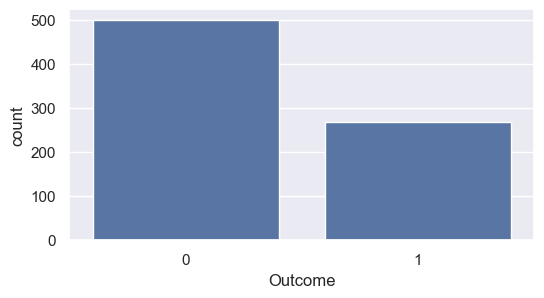

################### Pregnancies ###################
count   768.0000
mean      3.8451
std       3.3696
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       1.0000
30%       1.0000
40%       2.0000
50%       3.0000
60%       4.0000
70%       5.0000
80%       7.0000
90%       9.0000
95%      10.0000
99%      13.0000
100%     17.0000
max      17.0000
Name: Pregnancies, dtype: float64


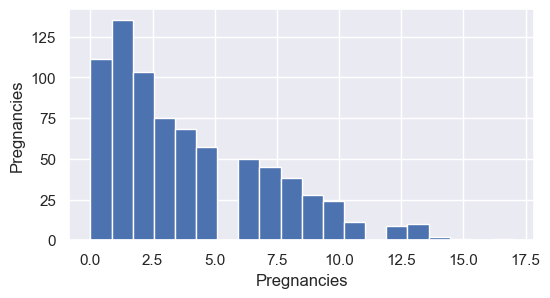

################### Glucose ###################
count   768.0000
mean    120.8945
std      31.9726
min       0.0000
1%       57.0000
5%       79.0000
10%      85.0000
20%      95.0000
30%     102.0000
40%     109.0000
50%     117.0000
60%     125.0000
70%     134.0000
80%     147.0000
90%     167.0000
95%     181.0000
99%     196.0000
100%    199.0000
max     199.0000
Name: Glucose, dtype: float64


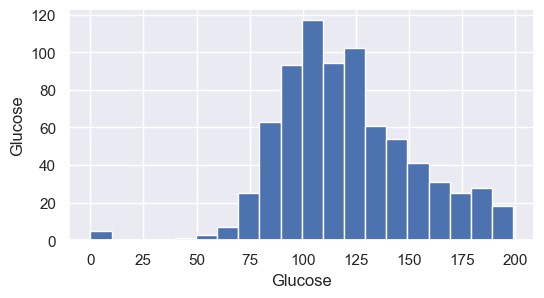

################### BloodPressure ###################
count   768.0000
mean     69.1055
std      19.3558
min       0.0000
1%        0.0000
5%       38.7000
10%      54.0000
20%      60.0000
30%      64.0000
40%      68.0000
50%      72.0000
60%      74.0000
70%      78.0000
80%      82.0000
90%      88.0000
95%      90.0000
99%     106.0000
100%    122.0000
max     122.0000
Name: BloodPressure, dtype: float64


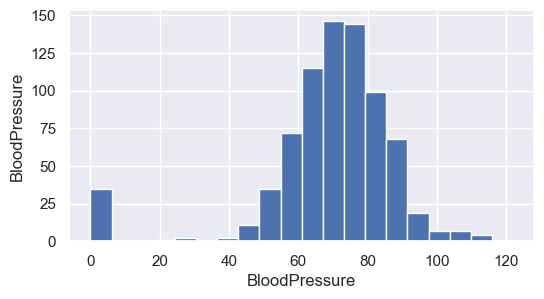

################### SkinThickness ###################
count   768.0000
mean     20.5365
std      15.9522
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       8.2000
40%      18.0000
50%      23.0000
60%      27.0000
70%      31.0000
80%      35.0000
90%      40.0000
95%      44.0000
99%      51.3300
100%     99.0000
max      99.0000
Name: SkinThickness, dtype: float64


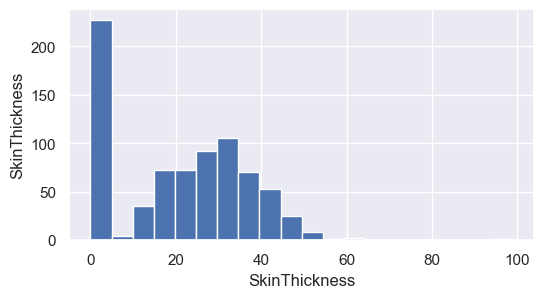

################### Insulin ###################
count   768.0000
mean     79.7995
std     115.2440
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       0.0000
40%       0.0000
50%      30.5000
60%      72.2000
70%     106.0000
80%     150.0000
90%     210.0000
95%     293.0000
99%     519.9000
100%    846.0000
max     846.0000
Name: Insulin, dtype: float64


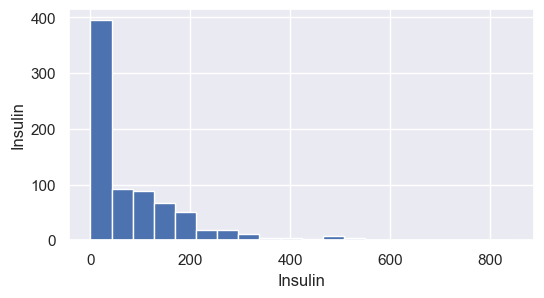

################### BMI ###################
count   768.0000
mean     31.9926
std       7.8842
min       0.0000
1%        0.0000
5%       21.8000
10%      23.6000
20%      25.9000
30%      28.2000
40%      30.1000
50%      32.0000
60%      33.7000
70%      35.4900
80%      37.8000
90%      41.5000
95%      44.3950
99%      50.7590
100%     67.1000
max      67.1000
Name: BMI, dtype: float64


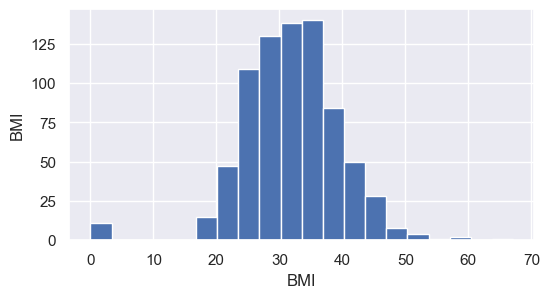

################### DiabetesPedigreeFunction ###################
count   768.0000
mean      0.4719
std       0.3313
min       0.0780
1%        0.0947
5%        0.1404
10%       0.1650
20%       0.2194
30%       0.2590
40%       0.3028
50%       0.3725
60%       0.4542
70%       0.5637
80%       0.6870
90%       0.8786
95%       1.1328
99%       1.6983
100%      2.4200
max       2.4200
Name: DiabetesPedigreeFunction, dtype: float64


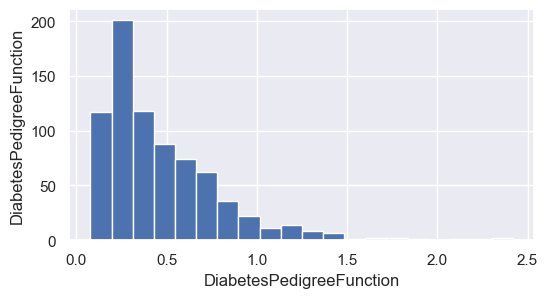

################### Age ###################
count   768.0000
mean     33.2409
std      11.7602
min      21.0000
1%       21.0000
5%       21.0000
10%      22.0000
20%      23.0000
30%      25.0000
40%      27.0000
50%      29.0000
60%      33.0000
70%      38.0000
80%      42.6000
90%      51.0000
95%      58.0000
99%      67.0000
100%     81.0000
max      81.0000
Name: Age, dtype: float64


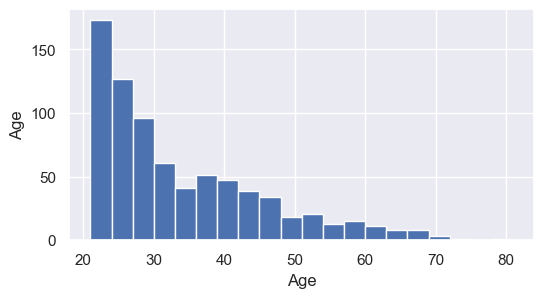

################### Outcome -> Outcome ###################
         Target Mean
Outcome             
0             0.0000
1             1.0000
#################### Outcome -> Pregnancies ####################
         Target Mean
Outcome             
0             3.2980
1             4.8657
#################### Outcome -> Glucose ####################
         Target Mean
Outcome             
0           109.9800
1           141.2575
#################### Outcome -> BloodPressure ####################
         Target Mean
Outcome             
0            68.1840
1            70.8246
#################### Outcome -> SkinThickness ####################
         Target Mean
Outcome             
0            19.6640
1            22.1642
#################### Outcome -> Insulin ####################
         Target Mean
Outcome             
0            68.7920
1           100.3358
#################### Outcome -> BMI ####################
         Target Mean
Outcome             
0            30.3

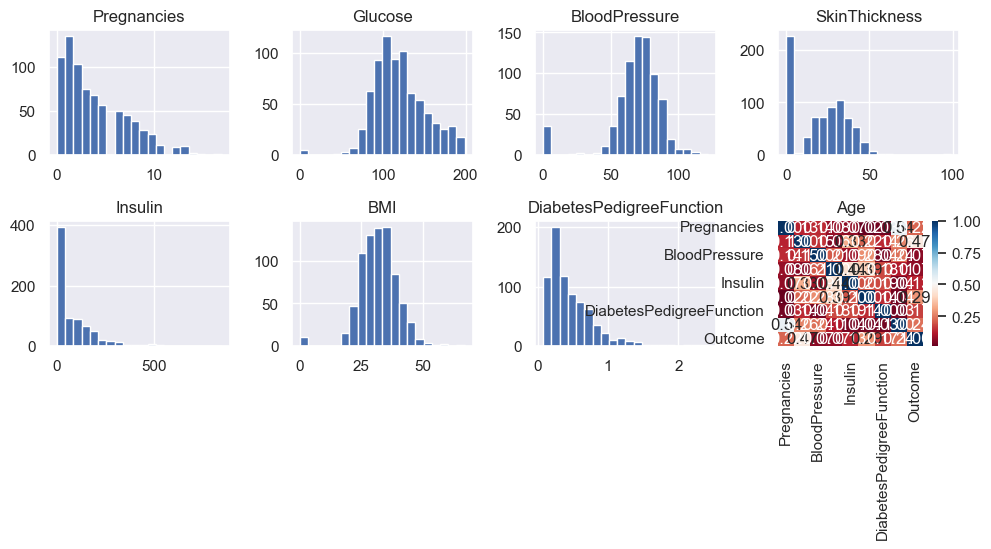

############ After Correlation Analysis, You Don't Need to Remove Variables ############


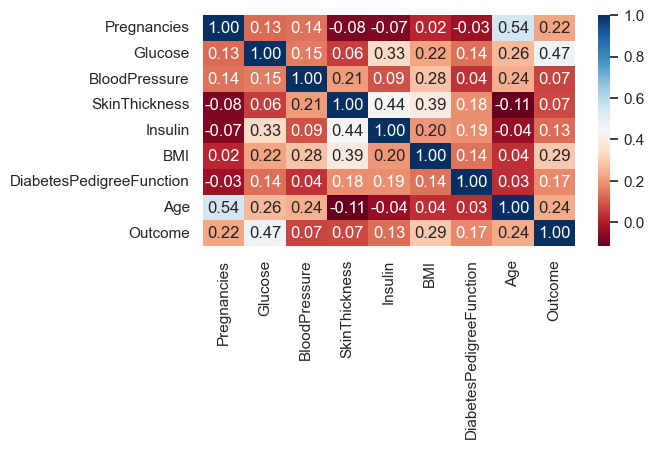

In [8]:
def cat_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_cols_names(dataframe)
    for col in cat_cols:
        if str(dataframe[col].dtypes) == "bool":
            new_df = pd.DataFrame()
            new_df[col] = dataframe[col].astype(int)
            cat_summary(new_df, col, plot=True)
        else:
            cat_summary(dataframe, col, plot=True)

cat_summary_df(df)

def num_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_cols_names(dataframe)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)

num_summary_df(df)

def plot_num_summary(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_cols_names(dataframe)
    plt.figure(figsize=(10, 4))
    for index, col in enumerate(num_cols):
        plt.subplot(2, 4, index + 1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)

plot_num_summary(df)

def target_summary_with_cat(dataframe, target, categorical_col):
    print(f"################### {target} -> {categorical_col} ###################")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(categorical_col)[target].mean()}))

def target_summary_with_cat_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_cols_names(dataframe)
    for col in cat_cols:
        target_summary_with_cat(dataframe, target, col)

target_summary_with_cat_df(df, "Outcome")

def target_summary_with_num(dataframe, target, numerical_col):
    print(f"#################### {target} -> {numerical_col} ####################")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(target)[numerical_col].mean()}))

def target_summary_with_num_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_cols_names(dataframe)
    for col in num_cols:
        target_summary_with_num(dataframe, target, col)

target_summary_with_num_df(df, "Outcome")

def high_correlated_cols(dataframe, corr_th=0.90, plot=False):
    numeric_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    corr_matrix = dataframe[numeric_cols].corr()
    corr_matrix = corr_matrix.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if drop_list == []:
        print("############ After Correlation Analysis, You Don't Need to Remove Variables ############")

    if plot:
        sns.set(rc={'figure.figsize': (6, 3)})
        sns.heatmap(corr_matrix, cmap="RdBu", annot=True, fmt=".2f")
        plt.show()

    return drop_list

high_correlated_cols(df, plot=True)

def high_correlated_df_remove(dataframe):
    drop_list = high_correlated_cols(dataframe)
    new_df = dataframe.drop(drop_list, axis=1)
    sns.set(rc={'figure.figsize': (6, 3)})
    sns.heatmap(new_df.corr(), cmap="RdBu", annot=True, fmt=".2f")
    plt.show()

high_correlated_df_remove(df)


#################### Head ####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.6000                    0.6270   50        1
1            1       85             66             29        0 26.6000                    0.3510   31        0
2            8      183             64              0        0 23.3000                    0.6720   32        1
3            1       89             66             23       94 28.1000                    0.1670   21        0
4            0      137             40             35      168 43.1000                    2.2880   33        1
#################### Tail ####################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.9000                    0.1710   63        0
764           

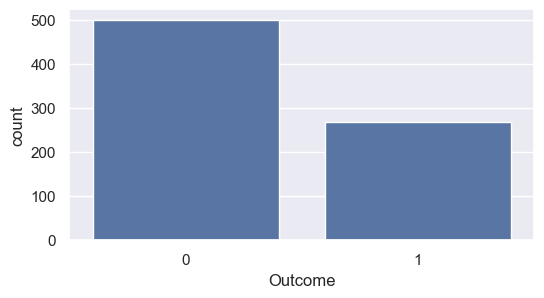

################### Pregnancies ###################
count   768.0000
mean      3.8451
std       3.3696
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       1.0000
30%       1.0000
40%       2.0000
50%       3.0000
60%       4.0000
70%       5.0000
80%       7.0000
90%       9.0000
95%      10.0000
99%      13.0000
100%     17.0000
max      17.0000
Name: Pregnancies, dtype: float64


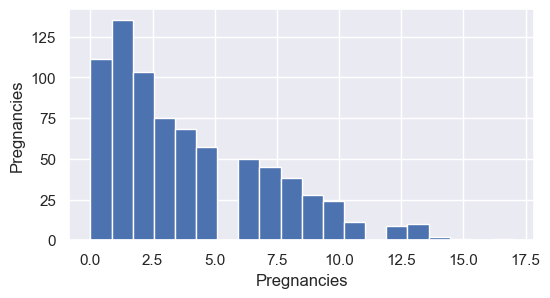

################### Glucose ###################
count   768.0000
mean    120.8945
std      31.9726
min       0.0000
1%       57.0000
5%       79.0000
10%      85.0000
20%      95.0000
30%     102.0000
40%     109.0000
50%     117.0000
60%     125.0000
70%     134.0000
80%     147.0000
90%     167.0000
95%     181.0000
99%     196.0000
100%    199.0000
max     199.0000
Name: Glucose, dtype: float64


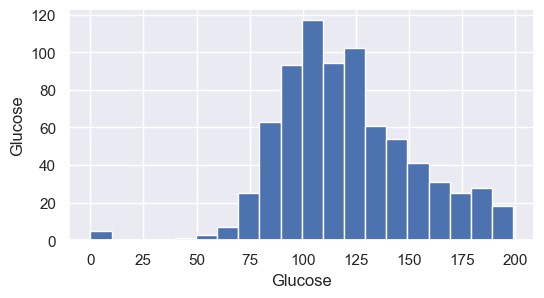

################### BloodPressure ###################
count   768.0000
mean     69.1055
std      19.3558
min       0.0000
1%        0.0000
5%       38.7000
10%      54.0000
20%      60.0000
30%      64.0000
40%      68.0000
50%      72.0000
60%      74.0000
70%      78.0000
80%      82.0000
90%      88.0000
95%      90.0000
99%     106.0000
100%    122.0000
max     122.0000
Name: BloodPressure, dtype: float64


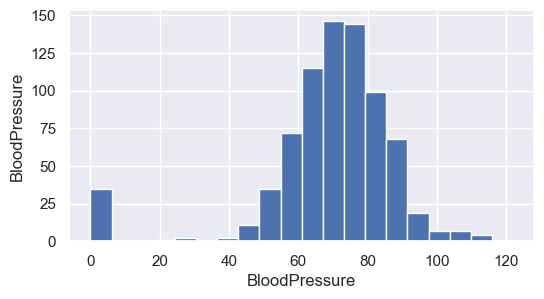

################### SkinThickness ###################
count   768.0000
mean     20.5365
std      15.9522
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       8.2000
40%      18.0000
50%      23.0000
60%      27.0000
70%      31.0000
80%      35.0000
90%      40.0000
95%      44.0000
99%      51.3300
100%     99.0000
max      99.0000
Name: SkinThickness, dtype: float64


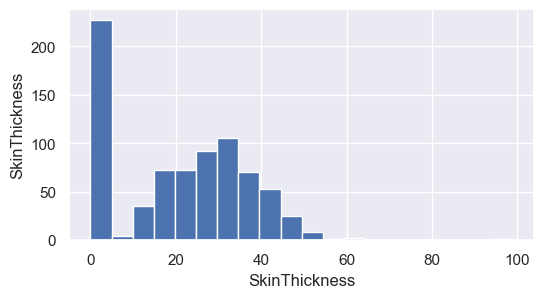

################### Insulin ###################
count   768.0000
mean     79.7995
std     115.2440
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       0.0000
40%       0.0000
50%      30.5000
60%      72.2000
70%     106.0000
80%     150.0000
90%     210.0000
95%     293.0000
99%     519.9000
100%    846.0000
max     846.0000
Name: Insulin, dtype: float64


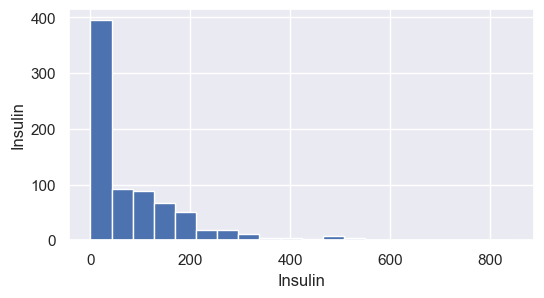

################### BMI ###################
count   768.0000
mean     31.9926
std       7.8842
min       0.0000
1%        0.0000
5%       21.8000
10%      23.6000
20%      25.9000
30%      28.2000
40%      30.1000
50%      32.0000
60%      33.7000
70%      35.4900
80%      37.8000
90%      41.5000
95%      44.3950
99%      50.7590
100%     67.1000
max      67.1000
Name: BMI, dtype: float64


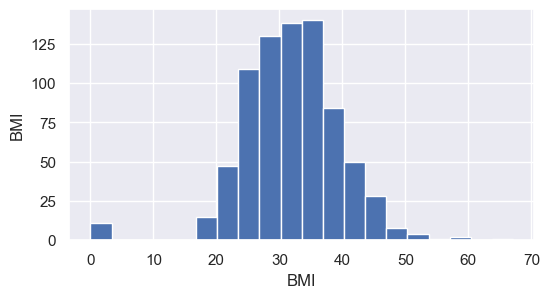

################### DiabetesPedigreeFunction ###################
count   768.0000
mean      0.4719
std       0.3313
min       0.0780
1%        0.0947
5%        0.1404
10%       0.1650
20%       0.2194
30%       0.2590
40%       0.3028
50%       0.3725
60%       0.4542
70%       0.5637
80%       0.6870
90%       0.8786
95%       1.1328
99%       1.6983
100%      2.4200
max       2.4200
Name: DiabetesPedigreeFunction, dtype: float64


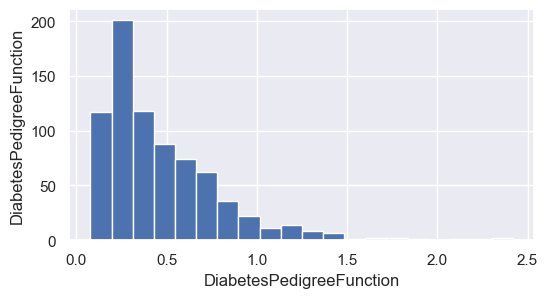

################### Age ###################
count   768.0000
mean     33.2409
std      11.7602
min      21.0000
1%       21.0000
5%       21.0000
10%      22.0000
20%      23.0000
30%      25.0000
40%      27.0000
50%      29.0000
60%      33.0000
70%      38.0000
80%      42.6000
90%      51.0000
95%      58.0000
99%      67.0000
100%     81.0000
max      81.0000
Name: Age, dtype: float64


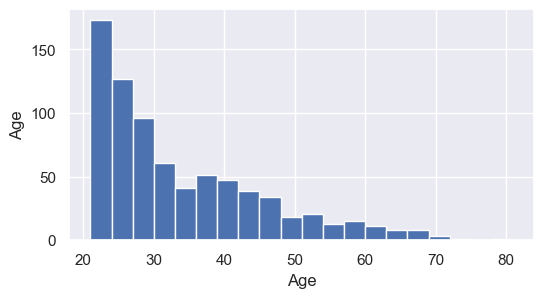

################### Outcome -> Outcome ###################
         Target Mean
Outcome             
0             0.0000
1             1.0000
#################### Outcome -> Pregnancies ####################
         Target Mean
Outcome             
0             3.2980
1             4.8657
#################### Outcome -> Glucose ####################
         Target Mean
Outcome             
0           109.9800
1           141.2575
#################### Outcome -> BloodPressure ####################
         Target Mean
Outcome             
0            68.1840
1            70.8246
#################### Outcome -> SkinThickness ####################
         Target Mean
Outcome             
0            19.6640
1            22.1642
#################### Outcome -> Insulin ####################
         Target Mean
Outcome             
0            68.7920
1           100.3358
#################### Outcome -> BMI ####################
         Target Mean
Outcome             
0            30.3

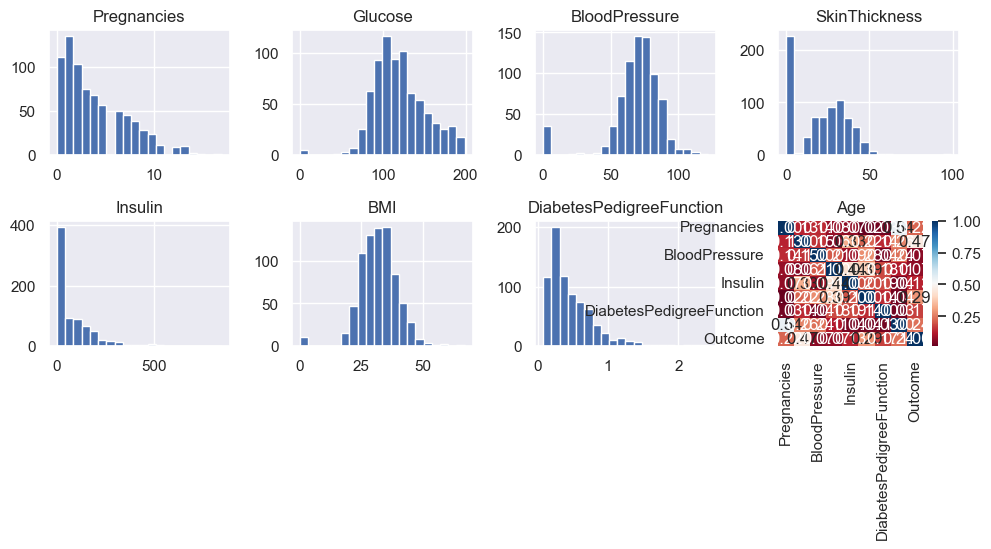

############ After Correlation Analysis, You Don't Need to Remove Variables ############


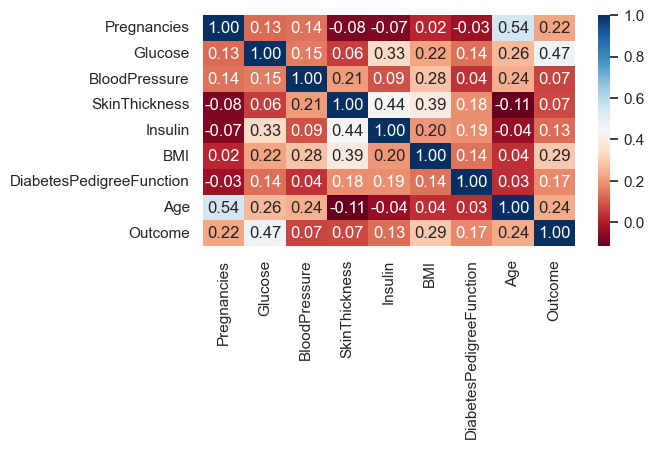

In [9]:
# Set display options for pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

# Function to display basic information about the DataFrame
def check_df(dataframe, head=5):
    # Display the head, tail, shape, data types, NA values, and quartile information
    print(20 * "#", "Head", 20 * "#")
    print(dataframe.head(head))
    print(20 * "#", "Tail", 20 * "#")
    print(dataframe.tail(head))
    print(20 * "#", "Shape", 20 * "#")
    print(dataframe.shape)
    print(20 * "#", "Types", 20 * "#")
    print(dataframe.dtypes)
    print(20 * "#", "NA", 20 * "#")
    print(dataframe.isnull().sum())
    print(20 * "#", "Quartiles", 20 * "#")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

# Function to separate columns based on their data types and unique counts
def grab_cols_names(dataframe, cat_th=10, car_th=20):
    # Categorize columns into different types based on thresholds
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "bool", "object"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and str(dataframe[col].dtypes) in ["uint8", "int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(df[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["uint8", "int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    return cat_cols, num_cols, cat_but_car, num_but_cat

# Function to summarize categorical columns
def cat_summary(dataframe, col_name, plot=False):
    print(f"################### {col_name} ###################")
    # Display value counts and their ratios
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        # Plot count distribution if specified
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

# Function to summarize numerical columns
def num_summary(dataframe, num_col, plot=False):
    print(f"################### {num_col} ###################")
    quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99, 1]
    # Display descriptive statistics including custom quantiles
    print(dataframe[num_col].describe(quantiles).T)

    if plot:
        # Plot histogram if specified
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.ylabel(num_col)
        plt.show()

# Function to create histograms for all numerical columns
def plot_num_summary(dataframe):
    plt.figure(figsize=(10, 4))
    for index, col in enumerate(num_cols):
        plt.subplot(2, 4, index + 1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)

# Function to analyze the relationship between target variable and categorical columns
def target_summary_with_cat(dataframe, target, categorical_col):
    print(f"################### {target} -> {categorical_col} ###################")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(categorical_col)[target].mean()}))

# Function to analyze the relationship between target variable and numerical columns
def target_summary_with_num(dataframe, target, numerical_col):
    print(f"#################### {target} -> {numerical_col} ####################")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(target)[numerical_col].mean()}))

# Function to identify highly correlated columns and optionally plot correlation matrix
def high_correlated_cols(dataframe, corr_th=0.90, plot=False):
    numeric_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    corr_matrix = dataframe[numeric_cols].corr()
    corr_matrix = corr_matrix.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if drop_list == []:
        print("############ After Correlation Analysis, You Don't Need to Remove Variables ############")

    if plot:
        sns.set(rc={'figure.figsize': (6, 3)})
        sns.heatmap(corr_matrix, cmap="RdBu", annot=True, fmt=".2f")
        plt.show()

    return drop_list

# Function to remove highly correlated columns and visualize the correlation matrix
def high_correlated_df_remove(dataframe):
    drop_list = high_correlated_cols(dataframe)
    new_df = dataframe.drop(drop_list, axis=1)
    sns.set(rc={'figure.figsize': (6, 3)})
    sns.heatmap(new_df.corr(), cmap="RdBu", annot=True, fmt=".2f")
    plt.show()

# Execute functions and analyze the dataset
cat_cols, num_cols, cat_but_car, num_but_cat = grab_cols_names(df)
print(f"Observation: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat Cols: {len(cat_cols)}")
print(f"Num Cols: {len(num_cols)}")
print(f"Cat But Car: {len(cat_but_car)}")
print(f"Num But Cat: {len(num_but_cat)}")

cat_summary_df(df)
num_summary_df(df)
plot_num_summary(df)
target_summary_with_cat_df(df, "Outcome")
target_summary_with_num_df(df, "Outcome")
high_correlated_cols(df, plot=True)
high_correlated_df_remove(df)
